# TP 1 - Séance I
## Qualité d'image

In [2]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

# Exercice I (7 points): Étude de la résolution
## Mesure de la résolution spatiale

**1.** Ouvrez et affichez l'image ```resolution.png```.

Text(0.5, 1.0, 'Image 1')

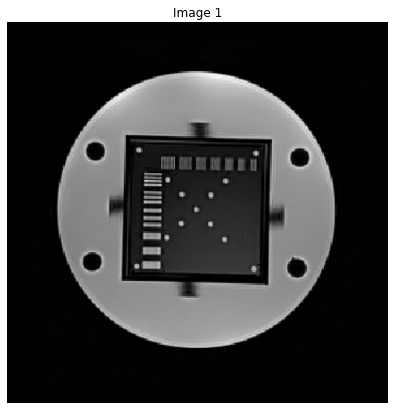

In [3]:
img = plt.imread("resolution.png") #Lire l'image
plt.imshow(img, cmap="gray") #Afficher en gris
plt.axis("off") #Pas d'axes
plt.title("Image 1") #Un titre

**2.** La largeur du cube central est de 10 cm. En déduire la largeur d'un pixel en millimètre.

In [4]:
# Les coordonnées des coins supérieurs du carré sont: (160,151) et (356, 157). 
#Le carré est croche, on cherche donc l'hypothénuse du triangle rectangle.
x= 356-160 #Grand côté du triangle rectangle, en nb de pixel
y= 157-151 #Petit côté du triangle rectangle, en nb de pixel
nbpixel_ligne = np.sqrt(x**2 +y**2) #Pythagore pour obtenir le nb de pixels de l'hypothénuse (largeur du cube central)

larg_pixel = 100/ nbpixel_ligne #Obtenir la largeur d'un pixel
print("Un pixel fait ",larg_pixel, "mm de large")

Un pixel fait  0.5099651909640567 mm de large


**3.** Définissez la méthode ```downsample(img, f)```:

In [5]:
def downsample(img, f):
    """ Sous-échantillone l'image img d'un facteur f
    @param img  L'image à sous-échantilloner.
    @param f    Le facteur de sous-échantillonage (un pixel sur f est conservé).
    @return     L'image sous-échantillonée: sa taille est celle d'img divisée par f.
    """
    
    img_sous = img[0::f, 0::f] #On prend un pixel sur f en x et en y.
    
    
    #y(n)=x(an) selon les notes de cours on sample 1/a points
    
    
    return img_sous

**4.** Affichez les images sous-échantillonnées avec ```f=2,5,8```. Comment évolue la largeur d'un pixel lors du sous-échantillonage?

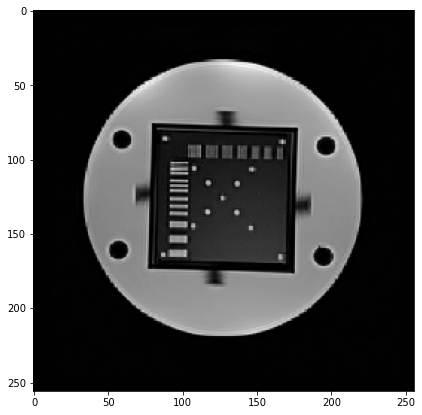

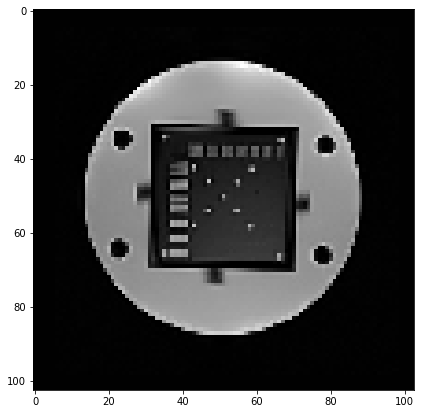

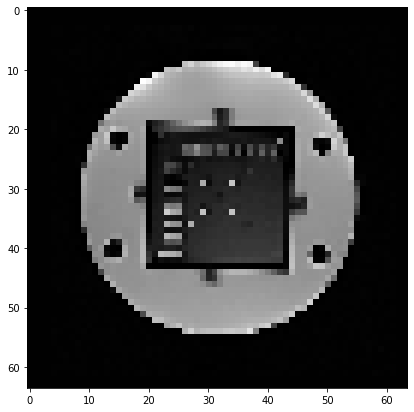

In [6]:
img_sous_2= downsample(img, 2) #Sous-échantilloner 
plt.figure() #Faire une figure
plt.imshow(img_sous_2, cmap="gray") #Voir l'image en niveaux de gris

img_sous_5 = downsample(img, 5)
plt.figure()
plt.imshow(img_sous_5, cmap="gray")

img_sous_8 = downsample(img, 8)
plt.figure()
plt.imshow(img_sous_8, cmap="gray")

#La largeur d'un pixel augmente lors du sous-échantillonage.


**5.** Affichez les profils d'intensités le long d'axes perpendiculaires aux mires. Quelle est l'épaisseur de la plus petite mire observable?

Text(0.5, 1.0, 'Intensité pixels ligne horizontale')

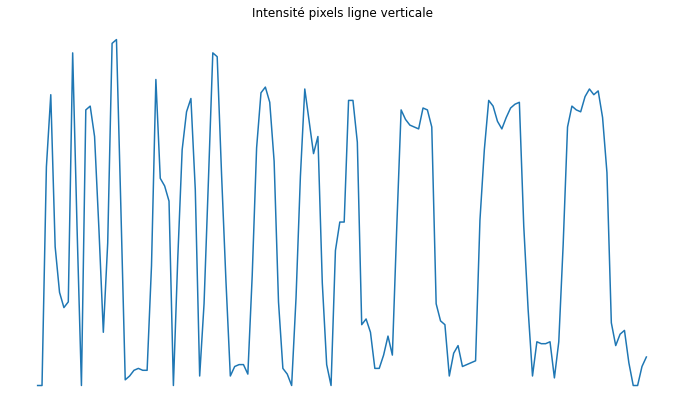

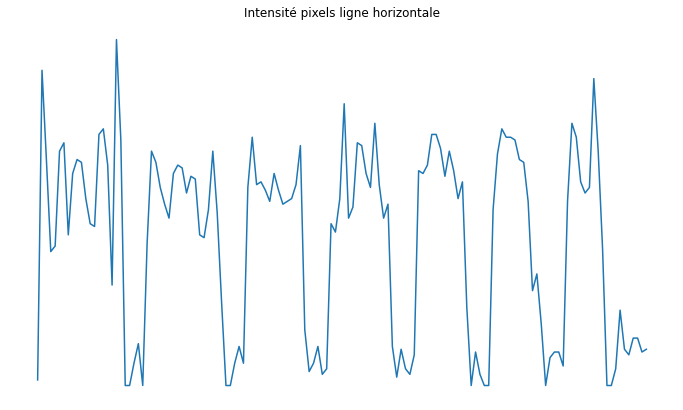

In [7]:
# Pour les deux profils vous pouvez prendre: y=201:341, x=200 et y=190, x=206:346.

#Afficher l'intensité des pixels de la ligne verticale 
plt.figure()
verticale = img[201:341, 200]
horx = np.linspace(0,140,140)
plt.plot(horx,verticale)
plt.axis("off")
plt.title("Intensité pixels ligne verticale")

#Afficher l'intensité des pixels de la ligne horizontale
plt.figure()
horizontale = img[190,206:346]
verty = np.linspace(0,140,140)
plt.plot(verty,horizontale)
plt.axis("off")
plt.title("Intensité pixels ligne horizontale")

#On voit les mires de 1/2 cm ,1/4 cm ,1/6 cm ,1/8 cm et 1 mm. La plus petite mire observable fait donc 1mm.


**6.** Discutez de la relation entre la résolution de l'image (largeur d'un pixel) et la taille du plus petit objet observable. Sachant la résolution, quelle est la taille minimale observable? Est-elle garantie?



In [8]:
#Plus la résolution est petite, plus on peut voir un petit objet.
#Si on connait la résolution de l'image, le plus petit ojet observable est de la taille d'un pixel. 
# Cette taille minimale observable n'est pas garantie, car si l'image est trop bruité ou que le contraste est trop bas
#, on ne pourra pas voir l'objet.

## Mesure de l'épaisseur de coupe

**7.** Affichez les profils d'intensités des 4 rampes et mesurer graphiquement la largeur des gaussiennes à mi-hauteur 

*Indice*: Vous pouvez normaliser le signal sur une gamme d’intensité plus facile à manipuler. Vous pouvez ensuite tracer une ligne horizontale pour vous aider à mesurer la largeur à mi-hauteur. Affichez les grilles sur les graphiques, puis augmentez la fréquence des ticks et la taille de l'image pour faciliter la mesure.

La rampe 1 fait 10.785763788889797 mm de largeur 
 La rampe 2 fait 9.051882139612006 mm de largeur 
 La rampe 3 fait 9.689338628317078 mm de largeur 
 La rampe 4 fait 9.306864735094035 mm de largeur 



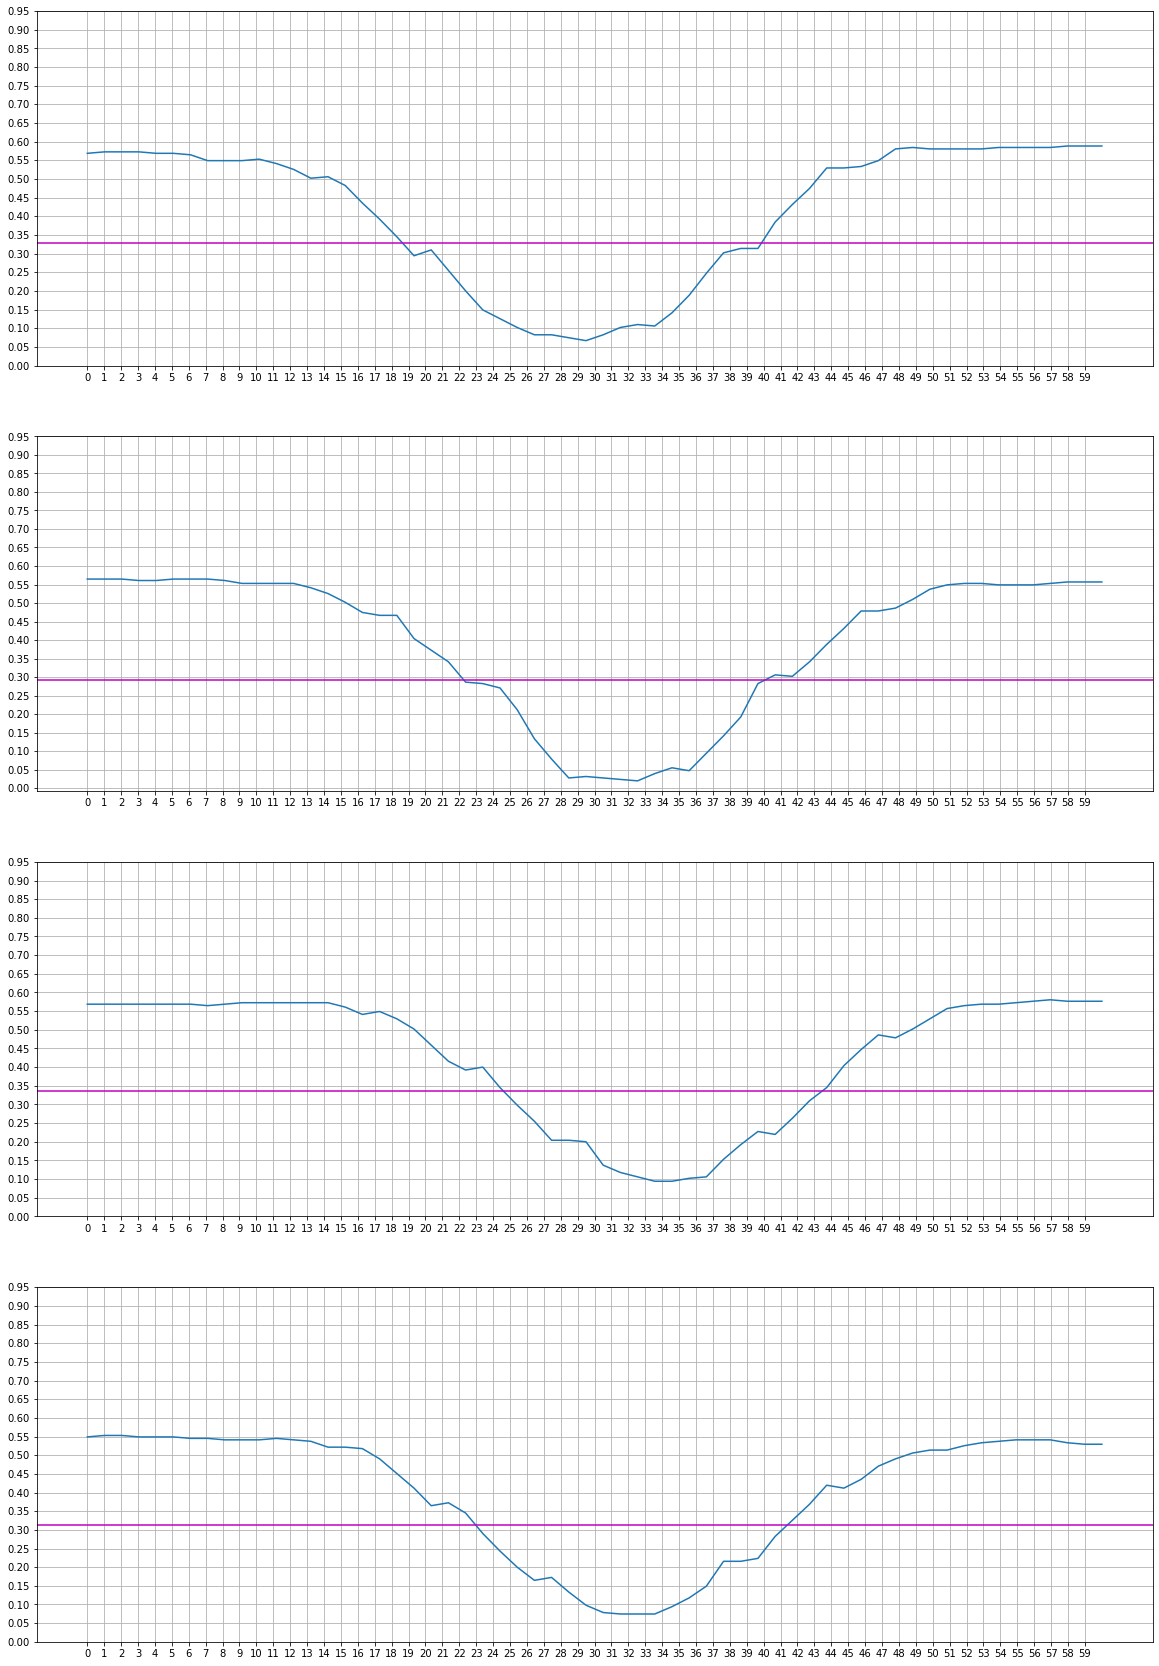

In [9]:
# Pour les coordonnées des profils on peut prendre:
# y=140; x=230:290 # Rampe 1
# y=230:290; x=365 # Rampe 2
# y=360; x=210:270 # Rampe 3
# y=215:275; x=147 # Rampe 4

#En assumant que la vraie largeur est la largeur à 1/2 hauteur.

#Trouver quels pixels de l'image font partie des rampes.
rampe1 = img[140, 230:290] 
rampe2 = img[230:290, 365]
rampe3 = img[360, 210:270]
rampe4 = img[215:275, 147]

#Créer un linspace du nombre de points appropriés pour tracer notre graphique
absc = np.linspace(0,60,60)

#Propriétés des plots
fig, axes = plt.subplots(4, 1)
fig.set_size_inches(20,30)

#Déterminer les propriétés de la grille
grid_x_ticks = np.arange(0,60,1)
grid_y_ticks = np.arange(0,1, 0.05)

#Tracer les graphiques
axes[0].plot(absc, rampe1) 
axes[1].plot(absc, rampe2) 
axes[2].plot(absc, rampe3) 
axes[3].plot(absc, rampe4)

#Tracer les grilles préalablement déterminées
axes[0].set_xticks(grid_x_ticks, minor=False)
axes[0].set_yticks(grid_y_ticks, minor=False)
axes[0].grid()

axes[1].set_xticks(grid_x_ticks, minor=False)
axes[1].set_yticks(grid_y_ticks, minor=False)
axes[1].grid()

axes[2].set_xticks(grid_x_ticks, minor=False)
axes[2].set_yticks(grid_y_ticks, minor=False)
axes[2].grid()

axes[3].set_xticks(grid_x_ticks, minor=False)
axes[3].set_yticks(grid_y_ticks, minor=False)
axes[3].grid()

#Trouver les mi-hauteurs des gaussiennes
moy1 = (rampe1.max() +rampe1.min() )/2
moy2 = (rampe2.max() +rampe2.min() )/2
moy3 = (rampe3.max() +rampe3.min() )/2
moy4 = (rampe4.max() +rampe4.min() )/2

#Tracer les lignes de mi-hauteur
axes[0].axhline(y=moy1, color='m') 
axes[1].axhline(y=moy2, color='m') 
axes[2].axhline(y=moy3, color='m') 
axes[3].axhline(y=moy4, color='m') 

#Calculer les largeurs en mm à partir des nombres de pixels trouvés de façon manuelle (observation visuelle)
largeur1 = (39.75-18.6)* larg_pixel
largeur2 = (40-22.25)*larg_pixel
largeur3 = (43.5-24.5)*larg_pixel
largeur4 = (41.25-23)*larg_pixel

#Afficher les valeurs de largeur
print("La rampe 1 fait",largeur1,"mm de largeur \n La rampe 2 fait",largeur2,"mm de largeur \n",
      "La rampe 3 fait",largeur3,"mm de largeur \n La rampe 4 fait",largeur4,"mm de largeur \n")




**8.** L'épaisseur de la coupe est donnée par $e=\tan(14^\circ) \times FWHM$ où $FWHM$ est la largeur à mi-hauteur en mm.
Sachant que les paramètres de l'IRM indiquent une épaisseur de coupe théorique de $2\pm0.2$ mm, passerait-il le controle qualité?

In [10]:
e1=np.tan(np.radians(14))*largeur1 
e2=np.tan(np.radians(14))*largeur2
e3=np.tan(np.radians(14))*largeur3 
e4=np.tan(np.radians(14))*largeur4 

print("L'épaisseur de coupe de la rampe 1 est de ",e1,"mm \n",
      "L'épaisseur de coupe de la rampe 2 est de ",e2,"mm \n",
      "L'épaisseur de coupe de la rampe 3 est de ",e3,"mm \n",
      "L'épaisseur de coupe de la rampe 4 est de ",e4,"mm \n\n", "Puisque l'épaisseur de coupe de toutes les rampes"
      " est plus grande que 2.2 mm, l'IRM ne passerait pas le contrôle qualité")


L'épaisseur de coupe de la rampe 1 est de  2.689192944622191 mm 
 L'épaisseur de coupe de la rampe 2 est de  2.256887695841319 mm 
 L'épaisseur de coupe de la rampe 3 est de  2.415823449069581 mm 
 L'épaisseur de coupe de la rampe 4 est de  2.320461997132624 mm 

 Puisque l'épaisseur de coupe de toutes les rampes est plus grande que 2.2 mm, l'IRM ne passerait pas le contrôle qualité


# Exercice II (6 points): Analyse du contraste et du bruit
## Mesure du contraste

**1.** Chargez  et affichez l'image ```contraste.png```.

(512, 512)


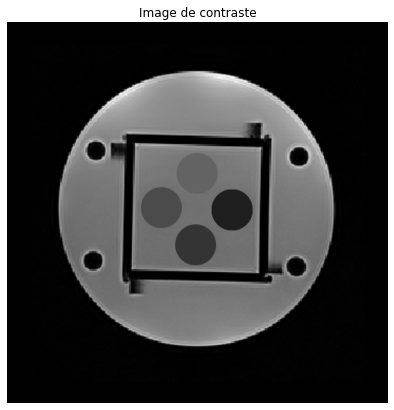

In [11]:
img2 = plt.imread("contraste.png")
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.title("Image de contraste")

print(img2.shape) # Avoir la taille de l'image pour la question sur le masque du fond du fantome

**2.** Chargez  et affichez les 4 matrices ```vial1.npy```, ```vial2.npy```, ```vial3.npy```, ```vial4.npy```.

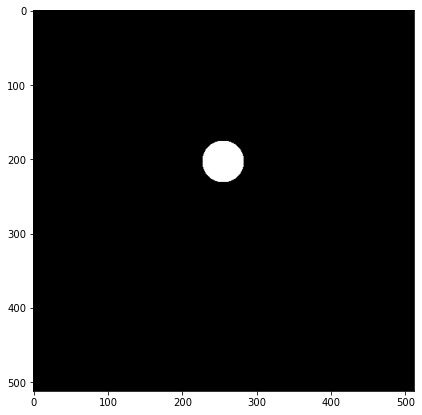

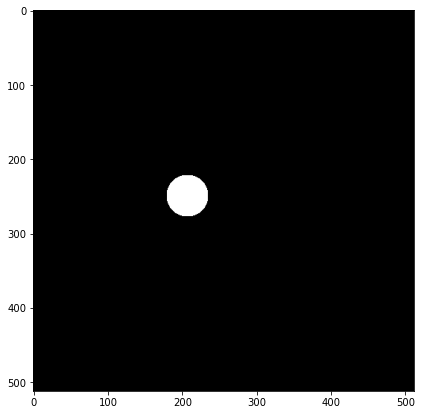

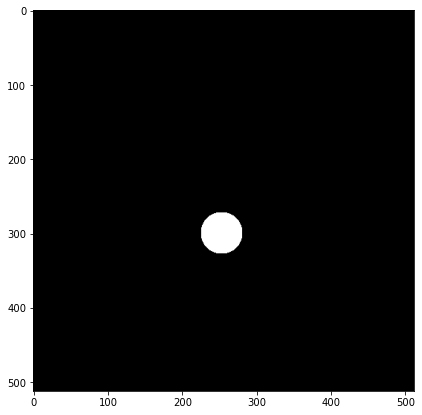

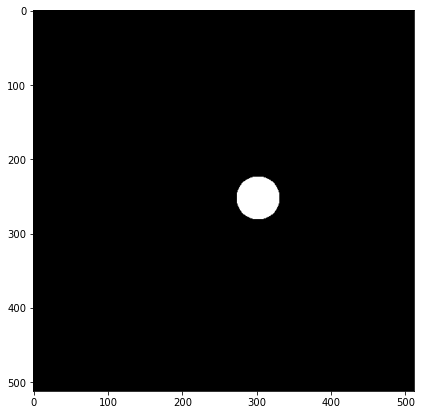

In [12]:
# Utilisez np.load('fichier.npy') pour charger une matrice numpy.
plt.figure() # Pour avoir une figure distincte
vial1 = np.load('vial1.npy') # Pour charger la matrice
plt.imshow(vial1,cmap="gray") # Nous affichons en image et non en matrice FALSE TRUE pour faciliter la visualisation

plt.figure()
vial2 = np.load('vial2.npy')
plt.imshow(vial2, cmap="gray")

plt.figure()
vial3 = np.load('vial3.npy')
plt.imshow(vial3, cmap="gray")

plt.figure()
vial4 = np.load('vial4.npy')
plt.imshow(vial4, cmap="gray")


**3.** Définissez et affichez le masque du fond du fantôme qui est constitué du carré central privé des 4 ampoules.
Pour le carré central vous pourrez prendre la région: 

$174\leq y<330$ et $178\leq x<331$

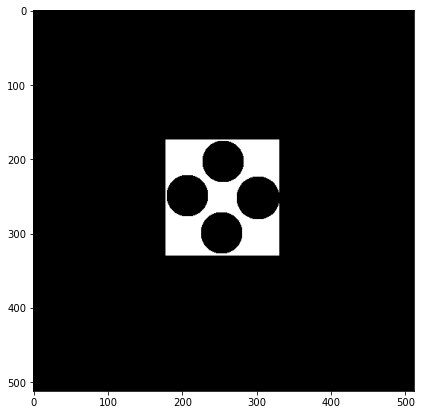

In [13]:
# Création d'une matrice de zéros de la taille de l'image
N = 512
M = 512
fond = np.zeros((N,M), dtype=bool) #S'assurer que le type soit booléen pour la suite

# Mettre les pixels du carré central à 1
fond[174:330,178:331] = 1

#Enlever les masques des ampoules
fond_mask = fond ^ vial1 ^ vial2 ^ vial3 ^ vial4 #^car on utilise des booléens donc pas de moins

#Afficher le masque du fond du fantôme
plt.imshow(fond_mask, cmap="gray")






**4.** Calculez l'intensité moyenne sur ces 4 régions et sur le fond du fantôme. En déduire le contraste entre chaque ampoule et le fond du fantôme.

In [14]:
# Pour extraire la valeur des pixels d'une image appartenant à un masque on utilise la syntaxe:
# image[masque]  (où image et masque on la même taille et où masque est une matrice booléenne)

# Trouver les moyennes des intensités des ampoules
vial1_mean = (img2[vial1]).mean()
vial2_mean = (img2[vial2]).mean()
vial3_mean = (img2[vial3]).mean()
vial4_mean = (img2[vial4]).mean()

#Trouver la moyenne de l'intensité du carré de fond

fond_mean = (img2[fond_mask]).mean()

#Trouver les contrastes locaux ((Icible - Ifond) / Ifond)
contraste1 = (vial1_mean - fond_mean)/ fond_mean
contraste2 = (vial2_mean - fond_mean)/ fond_mean
contraste3 = (vial3_mean - fond_mean)/ fond_mean
contraste4 = (vial4_mean - fond_mean)/ fond_mean


#Afficher les résultats de contraste
print("Voici le contraste entre l'ampoule 1 et le fond : ", 
      contraste1 , "\n Voici le contraste entre l'ampoule 2 et le fond : ",
      contraste2,"\n Voici le contraste entre l'ampoule 3 et le fond : "
      ,contraste3,"\n Voici le contraste entre l'ampoule 4 et le fond : ",contraste4)

Voici le contraste entre l'ampoule 1 et le fond :  -0.13934109 
 Voici le contraste entre l'ampoule 2 et le fond :  -0.3422397 
 Voici le contraste entre l'ampoule 3 et le fond :  -0.5306777 
 Voici le contraste entre l'ampoule 4 et le fond :  -0.67711526


## Mesure du rapport signal/bruit

**5.** Chargez et affichez l'image ```bruit.png```. (Conservez les axes et afficher une grille).

(512, 512)


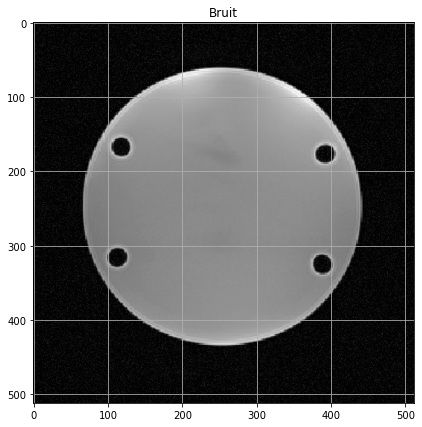

In [15]:
bruit = plt.imread("bruit.png") #Lire l'image
plt.figure() #Obtenir une figure distincte
plt.imshow(bruit, cmap="gray") # Afficher image en gris
plt.grid() #Mettre la grille
plt.title("Bruit") #Mettre un titre

print(bruit.shape) #Pour avoir la taille exacte de l'image

**6.** En vous aidant de l'image affichée à la question précédente, sélectionner grossièrement la région d'intéret et les 4 zones de fond. 

Puis calculez le rapport signal bruit en décibel.

In [25]:
# Création des matrices de zéros de la taille de l'image
N = 512 #Dimension selon la taille de l'image trouvée précédemment
M = 512
masque_fond = np.zeros((N,M), dtype=bool)
masque_interet = np.zeros((N,M), dtype=bool)

# Mettre les pixels des 4 zones de fond
#plt.figure() #Pour vérifier que le masque est correct
masque_fond[25:75,25:75] = 1
masque_fond[25:75,425:475] = 1
masque_fond[425:475,25:75] = 1
masque_fond[425:475,425:475] = 1
#plt.imshow(masque_fond, cmap="gray") #Vérifier que le masque est correct

#Mettre les pixels de la zone d'interet
#plt.figure() #Vérifier que le masque est correct
masque_interet[150:350,150:350] = 1
#plt.imshow(masque_interet, cmap="gray") #Vérifier que le masque est correct

#Calculer moyenne intensité du fond
bruit_mean = (bruit[masque_fond]).mean()

#Calculer moyenne intensité de la zone d'interet
interet_mean = (bruit[masque_interet]).mean()

#Si on décide d'utiliser SNRa: décommenter tout le paragraphe et commenter le suivant
#Calculer et afficher SNRa = amplitude signal / amplitude bruit
#SNRa = interet_mean / bruit_mean
#SNR_db = 20*np.log10(SNR) #Mettre en décibels avec la formule de l'amplitude
#print(SNR_db, "dB")

#Calculer et afficher SNRdiff = A*(fcible - ffond) / deltaA 
A = np.count_nonzero(masque_fond)*(larg_pixel**2) 
fcible = interet_mean
ffond = bruit_mean
deltaA = np.std(bruit[masque_fond])
SNR_diff = A*(fcible - ffond) / deltaA #Formule du SNRdiff
SNR_db = 10*np.log10(SNR_diff) #Mettre en dB
print(SNR_db, "dB")

46.32621005530031 dB


**7.** Que représente le rapport signal/bruit? Est-il préférable d'avoir un SNR faible ou fort?



In [17]:
#Le rapport signal/bruit (SNR) montre à quel point le signal est distinct du bruit. 
#Il est préférable d'avoir un SNR fort car on distingue mieux le signal d'interet. 

# Exercice III (bonus, 1.5 points)
## Comparaison d'imageries intra-vasculaires

**1.** Chargez et affichez les deux images ```echo.png``` et ```oct.png```. Convertissez l'image OCT en niveau de gris en sélectionnant son canal rouge.


Affichez les portions des images concernées par les masques ```echo_lum.npy```, ```echo_paroi.npy```, ```oct_lum.npy``` et ```oct_paroi.npy``` (en multipliant l'image par son masque).

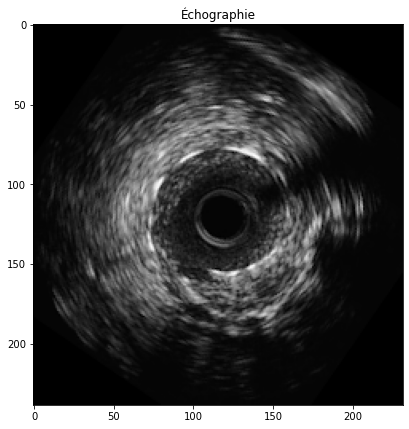

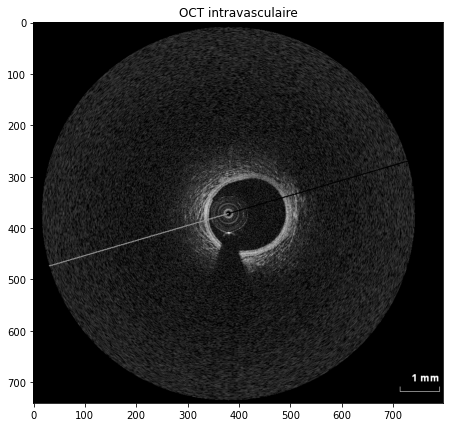

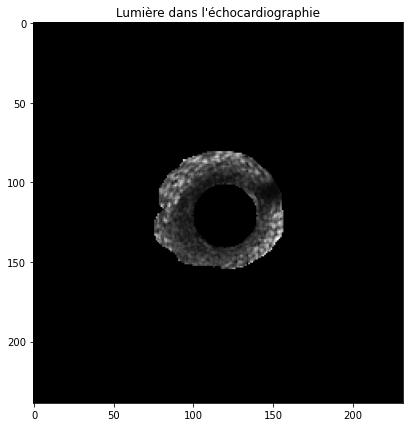

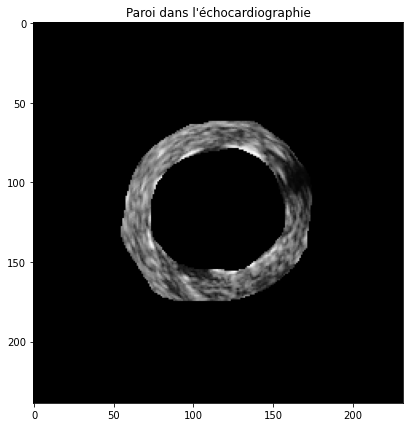

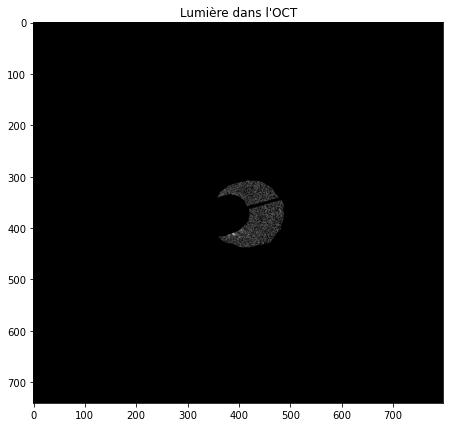

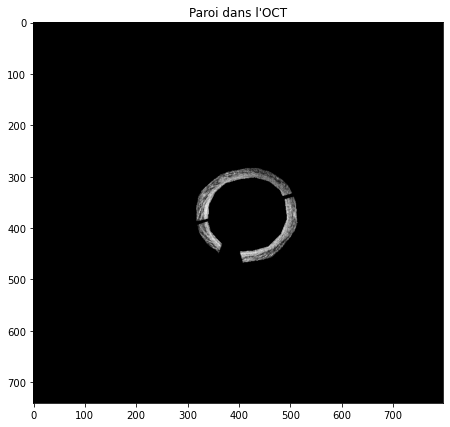

In [22]:
#Charger et afficher les images
echo = plt.imread("echo.png")
octo = plt.imread("oct.png")

plt.figure()
plt.title("Échographie")
plt.imshow(echo, cmap="gray")

plt.figure()
plt.title("OCT intravasculaire")
canal_rouge = octo[:,:,0]  #Prendre seulement le canal rouge
plt.imshow(canal_rouge, cmap="gray")

#Charger les masques
echo_lum = np.load('echo_lum.npy') # Pour charger la matrice
echo_paroi = np.load('echo_paroi.npy') # Pour charger la matrice
oct_lum = np.load('oct_lum.npy') # Pour charger la matrice
oct_paroi = np.load('oct_paroi.npy') # Pour charger la matrice

#Afficher les bonnes parties de l'image
plt.figure()
plt.title("Lumière dans l'échocardiographie")
echo_lum_img = echo*echo_lum 
plt.imshow(echo_lum_img, cmap="gray")

plt.figure()
plt.title("Paroi dans l'échocardiographie")
echo_paroi_img = echo*echo_paroi
plt.imshow(echo_paroi_img, cmap="gray")

plt.figure()
plt.title("Lumière dans l'OCT")
oct_lum_img = canal_rouge*oct_lum
plt.imshow(oct_lum_img, cmap="gray")

plt.figure()
plt.title("Paroi dans l'OCT")
oct_paroi_img = canal_rouge*oct_paroi
plt.imshow(oct_paroi_img, cmap="gray")

**2.** Calculez le contraste entre la paroi et la lumière du vaisseau ainsi que le SNR des deux modalités.

In [24]:
# Si les aires de région d'intérêt et de fond sont différentes, on prend l'aire du fond dans la formule du SNR.

#ECHOCARDIOGRAPHIE
#Calculer moyenne intensité de la lumiere ECHO
lumiere_echo = (echo[echo_lum]).mean()

#Calculer moyenne intensité de la paroi ECHO
paroi_echo = (echo[echo_paroi]).mean()

#Calculer et afficher le contraste ECHO contraste = ((Icible - Ifond) / Ifond)
#Ici, la paroi est la région d'interet
contraste_echo = (paroi_echo - lumiere_echo) / lumiere_echo
print("Contraste pour l'echo :", contraste_echo )

#SNR = amplitude signal / amplitude bruit ECHO
A_echo = np.count_nonzero(echo_lum)*(larg_pixel**2)#Aire du masque de fond
deltaA_echo = np.std(echo[echo_lum]) #Standard deviation de l'intensité des pixels sur l'aire de fond du masque
SNR_diff_echo = A_echo*(paroi_echo - lumiere_echo) / deltaA_echo #Formule du SNRdiff
SNR_db_echo = 10*np.log10(SNR_diff_echo) #Mettre en dB
print("SNR pour l'echo :", SNR_db_echo , "dB \n")



#OCT
#Calculer moyenne intensité de la lumiere OCT
lumiere_oct = (octo[oct_lum]).mean()

#Calculer moyenne intensité de la paroi OCT
paroi_oct = (octo[oct_paroi]).mean()

#Calculer et afficher le contraste OCT
contraste_oct = (paroi_oct - lumiere_oct) / lumiere_oct
print("Contraste pour l'oct :", contraste_oct )

#SNR = amplitude signal / amplitude bruit OCT
A_oct = np.count_nonzero(oct_lum)*(larg_pixel**2)
deltaA_oct = np.std(octo[oct_lum])
SNR_diff_oct = A_oct*(paroi_oct - lumiere_oct) / deltaA_oct #Formule du SNRdiff
SNR_db_oct = 10*np.log10(SNR_diff_oct) #Mettre en dB
print("SNR pour l'oct :", SNR_db_oct , "dB \n")




Contraste pour l'echo : 1.6225232
SNR pour l'echo : 34.035630605202996 dB 

Contraste pour l'oct : 0.46274164
SNR pour l'oct : 28.708834009313662 dB 



**3.** Discutez du choix entre l'OCT et de l'echocardiographie pour une simple mesure du diamètre de la lumière du vaisseau.


In [20]:
#On remarque que le contraste et la SNR sont plus élevés pour l'echo. Puisque l'echo est moins couteux, ne
#nécéssite pas d'agent de contraste, et nous permet d'avoir une image plus distincte, on choisit cette méthode.
#Bien que l'OCT permette peut-être d'obtenir une meilleure résolution radiale, pour une simple mesure de diamètre
#de la lumière, il nous faut simplement une image bien contrasté avec un bon SNR, pour pouvoir avoir des 
#limites claires. L'echo est donc le meilleur choix. 